In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import accuracy_score, mean_squared_error, silhouette_score
from sklearn import tree
import graphviz
import os
trash = pd.read_csv('Dummy_Trash_Pickup_Dataset.csv', sep=',')

In [30]:
trash.head()

,Id,Time,TrashType,Location,Confidence,Temperature
0,433b711b-bc26-46bd-a4e2-b2a544b4b295,2025-06-20T19:00:00,restafval,"Westerpark 9, Breda",0.74,23.0
1,813eebe0-ded9-4439-9e34-2a5a5e305bc7,2025-06-15T15:15:00,blik,"Grote Markt 1, Breda",0.61,15.8
2,f0202e87-9703-475b-ae1a-0805b6c1a9a1,2025-06-03T15:00:00,organic,"Princenhagelaan 102, Breda",0.94,20.7
3,cab7e1c5-f5f6-4062-a221-95851bf6a5e2,2025-06-02T17:00:00,paper,"Westerpark 9, Breda",0.54,10.8
4,d071e8ad-486a-4a94-bb97-e29eaf5a43b6,2025-06-13T12:30:00,plastic,"Nieuwe Ginnekenstraat 21, Breda",1.00,27.6


In [31]:
print(trash['Time'].dtype)
print(trash['Temperature'].dtype)

object
float64


In [32]:
features = ['Time', 'Temperature'] #add features per iteration such as 'body_mass_g'
X = trash[features]
y = trash['Location']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [34]:
# Convert 'Time' to datetime
trash['Time'] = pd.to_datetime(trash['Time'])

# Extract useful time-based features
trash['Hour'] = trash['Time'].dt.hour
trash['Day'] = trash['Time'].dt.day
trash['Weekday'] = trash['Time'].dt.weekday

# Use the new numeric features instead of the original 'Time'
features = ['Hour', 'Day', 'Weekday', 'Temperature']
X = trash[features]
y = trash['Location']

# Proceed with train-test split and model fitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', n_estimators=5, max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=5)

In [35]:
pip install fpdf

Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn import tree
import graphviz
from fpdf import FPDF

def plot_tree_classification(model, features, class_names, output_file='random_forest'):  
    if isinstance(model, RandomForestClassifier):
        pdf = FPDF()

        for i, tree_model in enumerate(model.estimators_):
            dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                  feature_names=features,  
                                  class_names=class_names,  
                                  filled=True, rounded=True,  
                                  special_characters=True)  

            # Turn into graph using graphviz
            graph = graphviz.Source(dot_data)  

            # Save as PNG for embedding in PDF
            image_file = f"{output_file}_tree_{i+1}.png"
            graph.render(filename=image_file, format='png')

            # Add each tree image to PDF
            pdf.add_page()
            pdf.image(image_file + '.png', x=10, y=10, w=180)

        # Save the complete PDF
        pdf_output_file = f"{output_file}.pdf"
        pdf.output(pdf_output_file)

        print(f"All trees saved in {pdf_output_file}.")

    else:
        raise ValueError("The model is not a RandomForestClassifier.")                                
    
    return graph

All trees saved in random_forest.pdf.


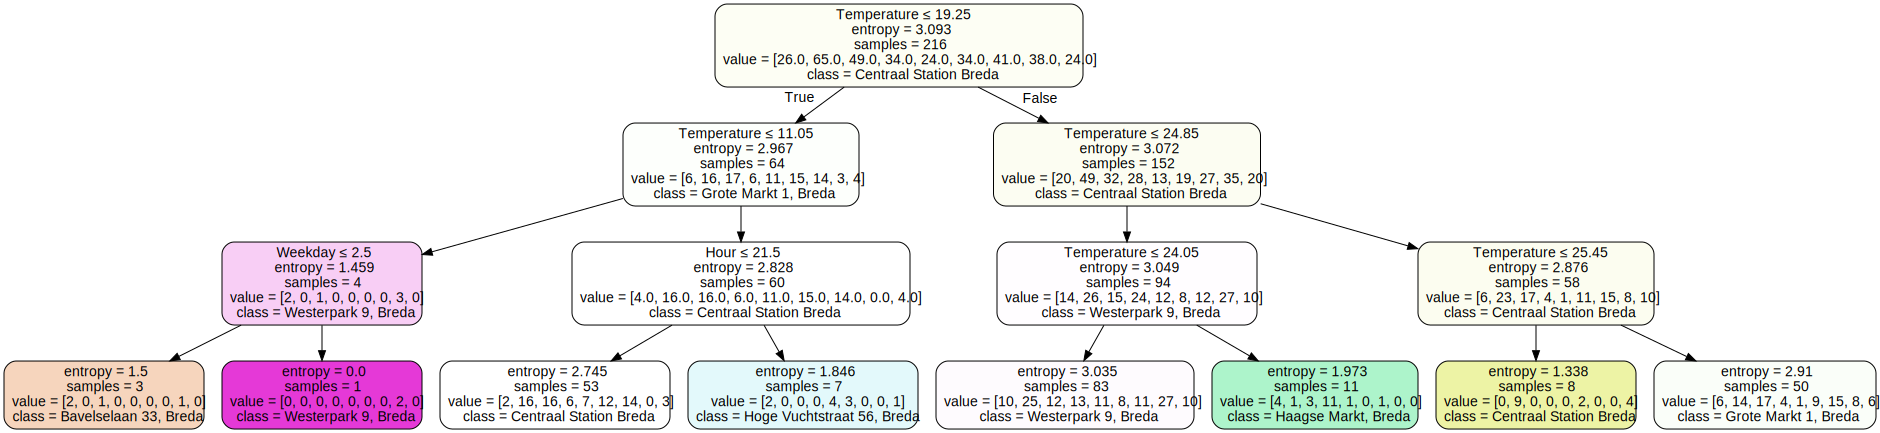

In [37]:
feature_names = X.columns
class_names = np.sort(np.unique(y)).astype(str)
plot_tree_classification(rf, feature_names, class_names)

In [38]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [39]:
predictionsOnTrainset = rf.predict(X_train)
predictionsOnTestset = rf.predict(X_test)

accuracyTrain = calculate_accuracy(predictionsOnTrainset, y_train)
accuracyTest = calculate_accuracy(predictionsOnTestset, y_test)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.25671641791044775
Accuracy on test set 0.13333333333333333


In [40]:
# Convert 'Time' to datetime
trash['Time'] = pd.to_datetime(trash['Time'])

# Extract useful time-based features
trash['Hour'] = trash['Time'].dt.hour
trash['Day'] = trash['Time'].dt.day
trash['Weekday'] = trash['Time'].dt.weekday

# Use the new numeric features instead of the original 'Time'
features = ['Hour', 'Day', 'Weekday', 'Temperature']
X = trash[features]
y = trash['Location']

# Proceed with train-test split and model fitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', n_estimators=5, max_depth=6)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=5)

In [41]:
import pandas as pd
 
# Laad je dataset
df = pd.read_csv("dummy_trash_pickup_dataset.csv")
 
# Verwijder cijfers uit de Location string (alleen huisnummers)
df['Location'] = df['Location'].str.replace(r'\d+', '', regex=True).str.strip()
 
# Eventueel: unieke waardes checken
print(df['Location'].unique())

['Westerpark , Breda' 'Grote Markt , Breda' 'Princenhagelaan , Breda'
 'Nieuwe Ginnekenstraat , Breda' 'Haagse Markt, Breda'
 'Centraal Station Breda' 'Hoge Vuchtstraat , Breda' 'Bavelselaan , Breda'
 'Wilhelminasingel , Breda']


In [42]:
df.head()

,Id,Time,TrashType,Location,Confidence,Temperature
0,433b711b-bc26-46bd-a4e2-b2a544b4b295,2025-06-20T19:00:00,restafval,"Westerpark , Breda",0.74,23.0
1,813eebe0-ded9-4439-9e34-2a5a5e305bc7,2025-06-15T15:15:00,blik,"Grote Markt , Breda",0.61,15.8
2,f0202e87-9703-475b-ae1a-0805b6c1a9a1,2025-06-03T15:00:00,organic,"Princenhagelaan , Breda",0.94,20.7
3,cab7e1c5-f5f6-4062-a221-95851bf6a5e2,2025-06-02T17:00:00,paper,"Westerpark , Breda",0.54,10.8
4,d071e8ad-486a-4a94-bb97-e29eaf5a43b6,2025-06-13T12:30:00,plastic,"Nieuwe Ginnekenstraat , Breda",1.00,27.6


In [43]:
features = ['Time', 'Temperature'] #add features per iteration such as 'body_mass_g'
X = df[features]
y = df['Location']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Convert 'Time' to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Extract useful time-based features
df['Hour'] = df['Time'].dt.hour
df['Day'] = df['Time'].dt.day
df['Weekday'] = df['Time'].dt.weekday

# Use the new numeric features instead of the original 'Time'
features = ['Hour', 'Day', 'Weekday', 'Temperature']
X = df[features]
y = df['Location']

# Proceed with train-test split and model fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

rf = RandomForestClassifier(criterion='entropy', n_estimators=5, max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=5)

In [46]:
from sklearn import tree
import graphviz
from fpdf import FPDF

def plot_tree_classification(model, features, class_names, output_file='random_forest'):  
    if isinstance(model, RandomForestClassifier):
        pdf = FPDF()

        for i, tree_model in enumerate(model.estimators_):
            dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                  feature_names=features,  
                                  class_names=class_names,  
                                  filled=True, rounded=True,  
                                  special_characters=True)  

            # Turn into graph using graphviz
            graph = graphviz.Source(dot_data)  

            # Save as PNG for embedding in PDF
            image_file = f"{output_file}_tree_{i+1}.png"
            graph.render(filename=image_file, format='png')

            # Add each tree image to PDF
            pdf.add_page()
            pdf.image(image_file + '.png', x=10, y=10, w=180)

        # Save the complete PDF
        pdf_output_file = f"{output_file}.pdf"
        pdf.output(pdf_output_file)

        print(f"All trees saved in {pdf_output_file}.")

    else:
        raise ValueError("The model is not a RandomForestClassifier.")                                
    
    return graph

All trees saved in random_forest.pdf.


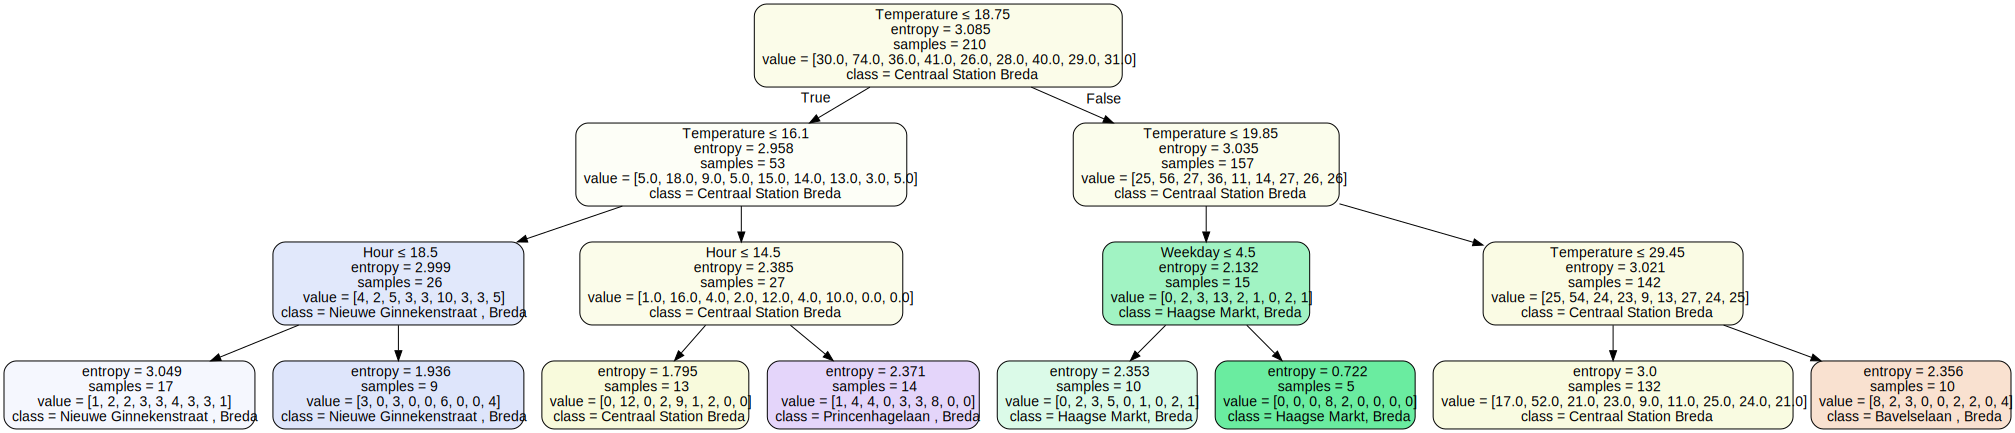

In [47]:
feature_names = X.columns
class_names = np.sort(np.unique(y)).astype(str)
plot_tree_classification(rf, feature_names, class_names)

In [48]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [49]:
predictionsOnTrainset = rf.predict(X_train)
predictionsOnTestset = rf.predict(X_test)

accuracyTrain = calculate_accuracy(predictionsOnTrainset, y_train)
accuracyTest = calculate_accuracy(predictionsOnTestset, y_test)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.2537313432835821
Accuracy on test set 0.09696969696969697


In [50]:
import pandas as pd
 
# Laad je dataset
ds = pd.read_csv("dummy_trash_pickup_dataset.csv")
 
# Verwijder cijfers uit de Location string (alleen huisnummers)
ds['Location'] = ds['Location'].str.replace(r'\d+', '', regex=True).str.strip()
 
# Eventueel: unieke waardes checken
print(ds['Location'].unique())


# Keep only the time part from the 'Time' column
ds['Time'] = pd.to_datetime(ds['Time']).dt.time

# Optional: check the result
print(ds['Time'].head())

['Westerpark , Breda' 'Grote Markt , Breda' 'Princenhagelaan , Breda'
 'Nieuwe Ginnekenstraat , Breda' 'Haagse Markt, Breda'
 'Centraal Station Breda' 'Hoge Vuchtstraat , Breda' 'Bavelselaan , Breda'
 'Wilhelminasingel , Breda']
0    19:00:00
1    15:15:00
2    15:00:00
3    17:00:00
4    12:30:00
Name: Time, dtype: object


In [51]:
ds.head()

,Id,Time,TrashType,Location,Confidence,Temperature
0,433b711b-bc26-46bd-a4e2-b2a544b4b295,19:00:00,restafval,"Westerpark , Breda",0.74,23.0
1,813eebe0-ded9-4439-9e34-2a5a5e305bc7,15:15:00,blik,"Grote Markt , Breda",0.61,15.8
2,f0202e87-9703-475b-ae1a-0805b6c1a9a1,15:00:00,organic,"Princenhagelaan , Breda",0.94,20.7
3,cab7e1c5-f5f6-4062-a221-95851bf6a5e2,17:00:00,paper,"Westerpark , Breda",0.54,10.8
4,d071e8ad-486a-4a94-bb97-e29eaf5a43b6,12:30:00,plastic,"Nieuwe Ginnekenstraat , Breda",1.00,27.6


In [52]:
features = ['Time', 'Temperature'] #add features per iteration such as 'body_mass_g'
X = ds[features]
y = ds['Location']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
ds = pd.read_csv("dummy_trash_pickup_dataset.csv")

# Clean 'Location' by removing house numbers
ds['Location'] = ds['Location'].str.replace(r'\d+', '', regex=True).str.strip()

# Convert 'Time' to datetime and extract only the time part
ds['Time'] = pd.to_datetime(ds['Time']).dt.time

# Extract hour from time (convert back to datetime to extract hour)
ds['Hour'] = pd.to_datetime(ds['Time'], format='%H:%M:%S').dt.hour

# Define features and target
features = ['Hour', 'Temperature']
X = ds[features]
y = ds['Location']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Train Random Forest model
rf = RandomForestClassifier(criterion='entropy', n_estimators=5, max_depth=6)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=5)

In [55]:
from sklearn import tree
import graphviz
from fpdf import FPDF

def plot_tree_classification(model, features, class_names, output_file='random_forest'):  
    if isinstance(model, RandomForestClassifier):
        pdf = FPDF()

        for i, tree_model in enumerate(model.estimators_):
            dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                  feature_names=features,  
                                  class_names=class_names,  
                                  filled=True, rounded=True,  
                                  special_characters=True)  

            # Turn into graph using graphviz
            graph = graphviz.Source(dot_data)  

            # Save as PNG for embedding in PDF
            image_file = f"{output_file}_tree_{i+1}.png"
            graph.render(filename=image_file, format='png')

            # Add each tree image to PDF
            pdf.add_page()
            pdf.image(image_file + '.png', x=10, y=10, w=180)

        # Save the complete PDF
        pdf_output_file = f"{output_file}.pdf"
        pdf.output(pdf_output_file)

        print(f"All trees saved in {pdf_output_file}.")

    else:
        raise ValueError("The model is not a RandomForestClassifier.")                                
    
    return graph

All trees saved in random_forest.pdf.


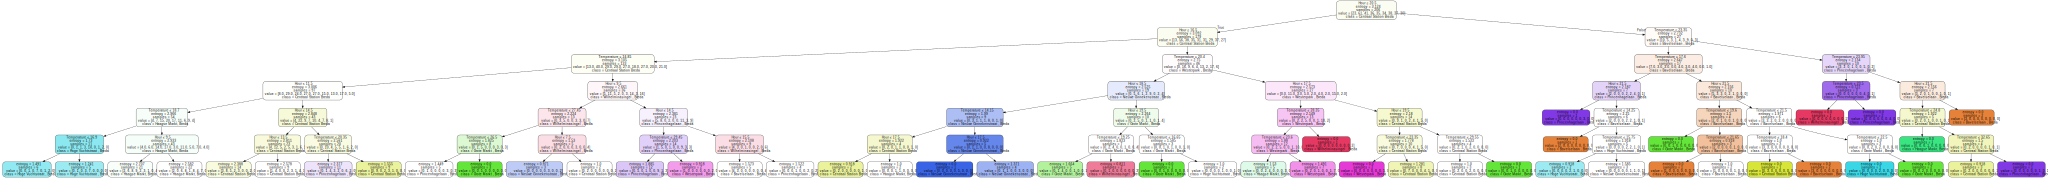

In [56]:
feature_names = X.columns
class_names = np.sort(np.unique(y)).astype(str)
plot_tree_classification(rf, feature_names, class_names)

In [58]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [59]:
predictionsOnTrainset = rf.predict(X_train)
predictionsOnTestset = rf.predict(X_test)

accuracyTrain = calculate_accuracy(predictionsOnTrainset, y_train)
accuracyTest = calculate_accuracy(predictionsOnTestset, y_test)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.5134328358208955
Accuracy on test set 0.15757575757575756
